In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

['Epoch', 'Time', 'Talk', 'Chair Gender', 'Speaker Gender', 'Questions', 'Splinter', 'Session type', 'speaker type', 'Comments']


In [2]:

import pandas
import numpy as np
from astropy.stats import funcs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

['Epoch', 'Time', 'Talk', 'Chair Gender', 'Speaker Gender', 'Questions', 'Splinter', 'Session type', 'speaker type', 'Comments']


In [3]:

df = pandas.read_csv("Gender-in-Astro/data/cs20/data_cleaned.csv", dtype=str)
print df.columns.tolist()

['Epoch', 'Time', 'Talk', 'Chair Gender', 'Speaker Gender', 'Questions', 'Splinter', 'Session type', 'speaker type', 'Comments']


In [4]:
n_qs_max = max([len(q) if isinstance(q, str) else 0 for q in df.Questions])

In [5]:
all_qs = "".join(np.asarray(df.Questions, dtype=str).flatten())
all_qs = all_qs.replace("nan", "")

n_f_qs = all_qs.count("F")
n_m_qs = all_qs.count("M")

print "Women asked {} questions and men asked {} questions.".format(n_f_qs, n_m_qs)
print "Women asked {:.1f}% of the questions.".format(float(n_f_qs) / (n_f_qs + n_m_qs) * 100.)

Women asked 135 questions and men asked 314 questions.
Women asked 30.1% of the questions.


[ 49.  81. 109. 124. 131. 132. 133.] 
[ 85. 176. 240. 270. 290. 302. 307.]


Text(0,0.5,'Fraction of Questions')

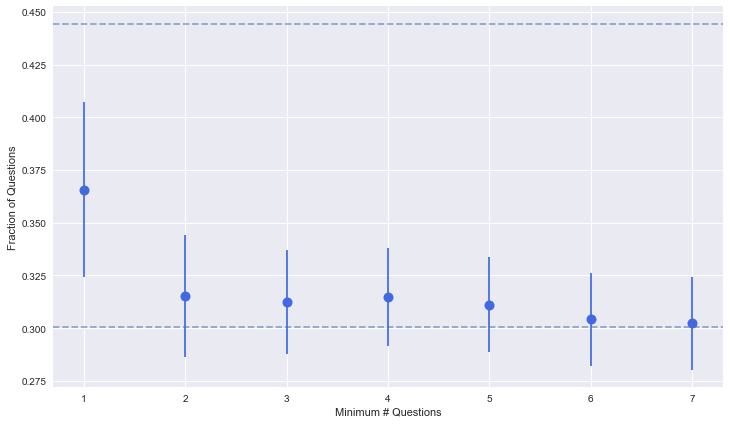

In [ ]:
n_qs = 7
counts_f, counts_m = np.zeros(n_qs, int), np.zeros(n_qs, int)
for q in df.Questions:  # loop all rows
    s = str(q)          # e.g. MFFMMF
    
    if s == "nan":      # no questions
        continue
    else:
        for i in range(min(len(s), n_qs)):    # each char of str
            if s[i] == "F":
                counts_f[i] += 1    # female asked
            elif s[i] == "M":
                counts_m[i] += 1    # male asked

cumulative_counts_f, cumulative_counts_m = np.zeros(n_qs, float), np.zeros(n_qs, float)
for i in range(n_qs):
    cumulative_counts_f[i] = sum(counts_f[:i+1])
    cumulative_counts_m[i] = sum(counts_m[:i+1])

print cumulative_counts_f, "\n", cumulative_counts_m

e = funcs.binom_conf_interval(cumulative_counts_f, cumulative_counts_m+cumulative_counts_f, interval='wald')
x = range(1, n_qs+1)
y = cumulative_counts_f/(cumulative_counts_f+cumulative_counts_m)
# y2 = cumulative_counts_m/(cumulative_counts_m+cumulative_counts_f)
# e2 = funcs.binom_conf_interval(cumulative_counts_m, cumulative_counts_m+cumulative_counts_f, interval='wald')

plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=np.abs(y-e), c='RoyalBlue', marker='o', ms=10, alpha=1, linestyle='none')
# plt.errorbar(x, y2, yerr=np.abs(y2-e2), c='red', marker='o', ms=10, alpha=1, linestyle='none')

n_s_f = float(sum(df["Speaker Gender"] == "F"))
n_s_m = float(sum(df["Speaker Gender"] == "M"))

plt.axhline(float(n_f_qs) / (n_f_qs + n_m_qs), alpha=0.6, ls="--")
plt.axhline(n_s_f/(n_s_m+n_s_f), alpha=0.6, ls="--")
plt.xlabel('Minimum # Questions')
plt.ylabel('Fraction of Questions')

# plt.plot(x, cumulative_counts_f, label="F", lw=3)
# plt.plot(x, cumulative_counts_m, label="M", lw=3)
# plt.legend()

# plt.plot(x, counts_f)
# plt.plot(x, counts_m)
